# Project: Data Wrangling (WeRateDog twitter data)

## Table of contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gather</a></li>
<li><a href="#access">Access</a></li>
<li><a href="#clean">Clean</a></li>
<li><a href="#eda">Analysing and Visualization of data</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id="intro"></a>
## Introduction

WeRateDogs is a twitter account which share dog images and write a brief panegyric about the dog, then they let their followers to rate it by favoriting it. By asking WeRateDogs to share with us some of their tweets, they did. They have shared 5000+ of their tweets which contains some basic data. Sometimes in their brief panegyric they mention the breed of the dog, and some others they don’t. But thanks to Udacity, they have performed some neutral network procedures to classify the dogs based on their images which are shared with the tweets.

<a id="gather"></a>

# Gather

In [1]:
#Import required libraries:

import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import datetime
import json
import os
import re
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
import random
from pandas import *

#### Image prediction .tsv file

In [2]:
#Download the image prediction .tsv file programmatically

folder_name = 'image_prediction'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [4]:
image_prediction = pd.read_csv('image_prediction/image-predictions.tsv', sep='\t')

#### twitter api .json file

In [8]:
#Read tweet_json.txt file, line by line, and create a list of dictionaries:

twitter_api = []
with open ('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        
        twitter_api.append({'tweet_id' : tweet_id,
                         'retweet_count' : retweet_count,
                         'favorite_count':favorite_count})

In [9]:
#Read the .json file in twitter_api dataframe:
twitter_api_df = pd.DataFrame(twitter_api)

#### twitter archived enhanced .csv file

In [10]:
#Read the .csv file in dataframe twitter_archive_enhanced:

twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

<a id="access"></a>

# Access

### Visual assessment

In [11]:
#Taking a view of the image_prediction table

image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
#Taking a view of the twitter_api_df table

twitter_api_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [13]:
#Taking a view of the twitter_archive_enhanced table

twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Programmatic assessment

In [14]:
#Taking a view of the image_prediction summary

image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
#Taking a view of the image_prediction summary statistics

image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
#Checking for duplicated values

image_prediction.duplicated().sum()

0

In [17]:
#Checking the summary of twitter_api_df dataframe

twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [18]:
#Checking the summary statistics for the twitter_api_df dataframe

twitter_api_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [19]:
#checking for duplicates in the twitter_api_df dataframe

twitter_api_df.duplicated().sum()

0

In [20]:
#Taking a view of twitter_archive_enhanced dataframe summary

twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [21]:
#Taking a view of the twitter_archive_enhanced dataframe summary statistics

twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [111]:
twitter_archive_enhanced['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
twitter_archive_enhanced.duplicated().sum()

0

In [26]:
#checking the unique values in the dog stages columns
stages = ['doggo', 'floofer', 'pupper', 'puppo']

for i in stages:
    print('Unique values in ', i , ' are:', twitter_archive_enhanced[i].unique())

Unique values in  doggo  are: ['None' 'doggo']
Unique values in  floofer  are: ['None' 'floofer']
Unique values in  pupper  are: ['None' 'pupper']
Unique values in  puppo  are: ['None' 'puppo']


In [44]:
#checking the total number of unique values

twitter_archive_enhanced['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [48]:
#actual number of tweets only

(twitter_archive_enhanced['tweet_id'].count())- (twitter_archive_enhanced['in_reply_to_status_id'].count() + twitter_archive_enhanced['retweeted_status_id'].count())

2097

In [52]:
#checking the values for dog name in the twitter_archive_enhanced table

twitter_archive_enhanced['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Brockly      1
Laika        1
Ralph        1
Olaf         1
Nigel        1
Name: name, Length: 957, dtype: int64

In [99]:
twitter_archive_enhanced.timestamp.head(6)

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
5    2017-07-29 00:08:17 +0000
Name: timestamp, dtype: object

## Quality

#### `image_prediction` table
- tweet_id is an int not string


#### `twitter_api_df` table
- tweet_id is an int not a string
- Non descriptive headers ('p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' )


#### `twitter_archive_enhanced` table
- tweet_id is an int not a string
- dog name different from original name in text column sometimes
- timestamp is an object not datetime datatype
- Null values filled with None in 'doggo', 'floofer', 'pupper', and 'puppo' columns
- tweet source not in right format
- irrelevants records of tweets ( 2356 instead of 2097)
- rating_denominators not in multiples of 10 sometimes


### Tidiness

- One variable(dog stage) in four columns(doggo, floofer, pupper, puppo)
- Tweet link in text column for twitter_archive_enhanced dataset
- The three datasets should be merged on tweet_id

<a id="clean"></a>

# Clean

In [59]:
# create a copy for each datasets

image_clean = image_prediction.copy()
tweet_api_clean = twitter_api_df.copy()
tweet_archive_clean = twitter_archive_enhanced.copy()

### tweet_id is an int not a string

#### Define

Change the tweet_id datatypes in `image_prediction`, `twitter_api`, and` twitter_archive` table to a string

#### Code

In [60]:
df_list = [image_clean,tweet_api_clean,tweet_archive_clean]

for table in df_list:
    table.tweet_id = table.tweet_id.astype(str)

#### Test

In [71]:
image_clean['tweet_id'].dtype

dtype('O')

In [72]:
tweet_api_clean['tweet_id'].dtype

dtype('O')

In [73]:
tweet_archive_clean['tweet_id'].dtype

dtype('O')

### Non descriptive headers ('p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' )

#### Define

Rename the columns to a more relatable name say: `p1 to dog_1, p1_conf to conf_1, p1_dog to result_1, p2 to dog_2, p2_conf to conf_2` and so on

#### Code

In [74]:
#Rename the 9 columns
image_clean = image_clean.rename(columns={'p1':'dog_1', 'p1_conf':'conf_1', 'p1_dog':'result_1', 
                                        'p2':'dog_2', 'p2_conf':'conf_2', 'p2_dog':'result_2', 
                                        'p3':'dog_3', 'p3_conf':'conf_3', 'p3_dog':'result_3'})

#### Test

In [75]:
image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_1', 'conf_1', 'result_1',
       'dog_2', 'conf_2', 'result_2', 'dog_3', 'conf_3', 'result_3'],
      dtype='object')

### dog name different from original name in text column sometimes

#### Define

- The name of dogs in the text columns of the `twitter_archive_enhanced` table did not match the names on the name column sometimes. 
- We would have to make use of regular expression to extract the original name from the text column and store it in a new column
- We drop the name column afterwards

#### Code

In [84]:
list(tweet_archive_clean.text.sample(10))

['This is Banditt. He is a brown LaBeouf retriever. Loves cold weather. 4 smaller dogs are his sons (probably). 10/10 https://t.co/Ko7eCsFpnI',
 "This is Mary. She's desperately trying to recreate her Coachella experience.   12/10 downright h*ckin adorable https://t.co/BAJrfPvtux",
 'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho',
 "I can't even comprehend how confused this dog must be right now. 10/10 https://t.co/8AGcQ4hIfK",
 'RT @dog_rates: This is Bell. She likes holding hands. 12/10 would definitely pet with other hand https://t.co/BXIuvkQO9b',
 "This is Gustaf. He's a purebred Chevy Equinox. Loves to shred. Gnarly lil pup. Great with the babes. 11/10 https://t.co/7CbO2eMAgJ",
 'This is just impressive I have nothing else to say. 11/10 https://t.co/LquQZiZjJP',
 'This is Albert. He just found out that bees are dying globally at an alarming rate. 10/10 heckin worried af now https://t

In [85]:
#Extract dog_name from text
tweet_archive_clean['dog_name'] = tweet_archive_clean.text.str.extract(
    "((?<= named )[A-Z][a-z]+| (?<= [i,']s )[A-Z][a-z]+| (?<=[M,m]eet )[A-Z][a-z]+| (?<= to )[A-Z][a-z]+)", expand = True)

#### Test

In [87]:
tweet_archive_clean[['dog_name','name']].sample(15)

,dog_name,name
2154,Penny,Penny
1740,Dwight,Dwight
435,Peaches,Peaches
1357,NaN,None
2144,Andru,Andru
319,Leo,Leo
2262,George,George
870,NaN,None
206,Aspen,Aspen
134,Lili,Lili


In [90]:
#Let's Check the new real dog names count after extraction from text column
tweet_archive_clean.dog_name.str.istitle().sum() - tweet_archive_clean.query('dog_name == "None"').count()[0]

1541

In [91]:
#Let's check the number of correct names in name column to evaluate our result
tweet_archive_clean.name.str.istitle().sum() - tweet_archive_clean.query('name == "None"').count()[0]

1496

In [96]:
tweet_archive_clean.dog_name.value_counts().sum()

1541

#### Define

- To avoid multiple column with same data, we drop the name column

#### Code

In [97]:
#Drop the `name` column
tweet_archive_clean = tweet_archive_clean.drop(['name'], axis = 1)

#### test

In [98]:
tweet_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_name'],
      dtype='object')

### Timestamp is an object not datetime datatype

#### Define

- Change the timestamp column from an object datatype to a datetime datatype after slicing

#### Code

In [100]:
#Cut the last 6 characters from datetime to fit our pattern
tweet_archive_clean['timestamp'] = tweet_archive_clean['timestamp'].astype('str').str[:-6]
tweet_archive_clean['timestamp'] = pd.to_datetime(tweet_archive_clean['timestamp'], format = '%Y-%m-%d %H:%M:%S')

#### Test

In [101]:
tweet_archive_clean.timestamp.dtype

dtype('<M8[ns]')

In [102]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

### Null values filled with None in 'doggo', 'floofer', 'pupper', and 'puppo' columns

#### Define

Null values were filled with None instead of the numpy null object. We therefore have to replacet the None with np.nan

#### Code

In [103]:
dog_stage = ['doggo', 'floofer', 'pupper','puppo']

for stages in dog_stage:
    tweet_archive_clean[stages].replace('None', np.nan, inplace=True)

#### Test

In [104]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

### tweet source not in right format

#### Define

source of tweets are embedded in HTML tags. We therefore use regular expression to extract the source

#### Code

In [107]:
#Using regex to extract the source 
tweet_archive_clean['source'] = tweet_archive_clean['source'].str.extract(r"(?<=>)(.*)(?=<)")

#### Test

In [108]:
tweet_archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### rating_denominators not in multiples of 10 sometimes

#### Define

- Values of rating_denominator must be 10 and it's multiplies, other values should be replaced with 10 in `twitter_archive_enhanced`

#### Code

In [114]:
#Replace 11, 16, 15, 7, 2, 0 values with 10 in rating_denominator
tweet_archive_clean['rating_denominator'] = tweet_archive_clean['rating_denominator'].replace(11,10)
tweet_archive_clean['rating_denominator'] = tweet_archive_clean['rating_denominator'].replace(16,10)
tweet_archive_clean['rating_denominator'] = tweet_archive_clean['rating_denominator'].replace(15,10)
tweet_archive_clean['rating_denominator'] = tweet_archive_clean['rating_denominator'].replace(7,10)
tweet_archive_clean['rating_denominator'] = tweet_archive_clean['rating_denominator'].replace(2,10)
tweet_archive_clean['rating_denominator'] = tweet_archive_clean['rating_denominator'].replace(0,10)

#### Test

In [115]:
tweet_archive_clean['rating_denominator'].value_counts()

10     2341
50        3
80        2
20        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
Name: rating_denominator, dtype: int64

#### Define

- Represent the rating in a single column that could be relatable

#### Code

In [116]:
#Store the rating into a column say dog_rating
tweet_archive_clean['dog_rating'] = 100*(tweet_archive_clean['rating_numerator']/tweet_archive_clean['rating_denominator'])

#### Test

In [117]:
tweet_archive_clean['dog_rating'].value_counts()

120.0      562
110.0      470
100.0      463
130.0      351
90.0       159
80.0       102
70.0        55
140.0       54
50.0        37
60.0        32
30.0        19
40.0        15
20.0        11
10.0         9
150.0        2
0.0          2
750.0        2
4200.0       2
200.0        1
270.0        1
240.0        1
170.0        1
6660.0       1
1820.0       1
9600.0       1
260.0        1
17760.0      1
Name: dog_rating, dtype: int64

#### Define

- Drop the rating_numerator and rating_denominator columns

#### Code

In [118]:
#Dropping the rating_numerator & rating_denominator columns
tweet_archive_clean = tweet_archive_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1)

#### Test

In [119]:
tweet_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'doggo', 'floofer',
       'pupper', 'puppo', 'dog_name', 'dog_rating'],
      dtype='object')

### Irrelevants records of tweets ( 2356 instead of 2097)

#### Define
We need to drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id & retweeted_status_timestamp after filtering them to only tweets and keep only NaN values in twitter_archive_enhanced

#### Code

In [121]:
#Create a loop to filter for NaN values and then drop the columns
list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
        'retweeted_status_user_id', 'retweeted_status_timestamp']

for cols in list:
    tweet_archive_clean = tweet_archive_clean[tweet_archive_clean[cols].isnull()]
    tweet_archive_clean = tweet_archive_clean.drop([cols], axis = 1)

#### Test

In [123]:
#Check for drop columns
tweet_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'doggo',
       'floofer', 'pupper', 'puppo', 'dog_name', 'dog_rating'],
      dtype='object')

In [125]:
#Make sure that we have only 2097 rows
tweet_archive_clean.shape[0]

2097

#### Define
- keep only tweets with images and drop NaN values in the `expanded_urls` columns

#### Code

In [126]:
#Use notna to keep only the tweets with photos 
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean['expanded_urls'].notna()]

#### Test

In [127]:
tweet_archive_clean['expanded_urls'].isnull().sum()

0

### One variable(dog stage) in four columns(doggo, floofer, pupper, puppo)

#### Define

The dog stages should be in one column, hence no need for multiple stage columns. We drop the `'doggo', 'puppo', 'pupper', 'floofer'` columns afterwards

#### Code1

In [128]:
#Create a list for the stage columns
dog_stages = ['doggo', 'puppo', 'pupper', 'floofer']

#Create a loop to replace the NaN in the 4 columns with space ''
for stage in dog_stages:
    tweet_archive_clean[stage] = tweet_archive_clean[stage].replace(np.nan,'')

In [129]:
#Create a new column for the dog stages and fill it with the data in the 4 columns

tweet_archive_clean['stage'] = tweet_archive_clean['doggo'] + tweet_archive_clean['puppo'] + tweet_archive_clean['pupper'] + tweet_archive_clean['floofer']

#### Test1

In [130]:
#Check the new stage values 
tweet_archive_clean['stage'].value_counts()

                1759
pupper           220
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

- We could see that some dogs have two stages, hence let's separate them with the underscore character to have a better look

#### Code2

In [131]:
#Add a "_" between the two stages in one cell
tweet_archive_clean['stage'] = tweet_archive_clean['stage'].replace('doggopupper','doggo_pupper')
tweet_archive_clean['stage'] = tweet_archive_clean['stage'].replace('doggopuppo','doggo_puppo')
tweet_archive_clean['stage'] = tweet_archive_clean['stage'].replace('doggofloofer','doggo_floofer')

#### Test2

In [132]:
tweet_archive_clean['stage'].value_counts()

                 1759
pupper            220
doggo              72
puppo              23
floofer             9
doggo_pupper        9
doggo_floofer       1
doggo_puppo         1
Name: stage, dtype: int64

#### Code3

In [133]:
#Drop the 4 columns ['doggo', 'puppo', 'pupper', 'floofer'] from the tweet_archive_clean table
tweet_archive_clean = tweet_archive_clean.drop(['doggo', 'puppo', 'pupper', 'floofer'], axis = 1)

#### Test3

In [135]:
#Check the new columns of archive_copy
tweet_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'dog_name',
       'dog_rating', 'stage'],
      dtype='object')

### Tweet link in text column for twitter_archive_enhanced dataset

#### Define

Tweet link should be separated from the text column for easy access using regular expression and stored in a separate column

#### Code

In [141]:
#Taking a view of some the tweet link to know how to define our regex pattern

dict(tweet_archive_clean['text'].sample(7))

{1851: "This is Lenny. He was just told that he couldn't explore the fish tank. 12/10 smh all that work for nothing https://t.co/JWi6YrpiO1",
 1891: "These two pups are masters of camouflage. Very dedicated to the craft. Both must've spent decades practicing. 10/10s https://t.co/RBiQ8hPqwr",
 2137: "This is Ben &amp; Carson. It's impossible for them to tilt their heads in the same direction. Cheeky wink by Ben. 11/10s https://t.co/465sIBdvzU",
 559: 'This is Winston. His selfie game is legendary. Will steal your girl with a single snap. 11/10 handsome as h*ck https://t.co/jxQhxoPsgL',
 1101: "This is Dakota. He hasn't grow into his skin yet. 11/10 would squeeze softly https://t.co/IvFSlNXpgj",
 2219: 'This is Jo. Jo is a Swedish Queso. Tongue bigger than face. Tiny lil legs. Still no seatbelt. Simply careless. 8/10 https://t.co/Edy7B5vOp2',
 999: "Stop what you're doing and watch this heckin masterpiece right here. Both 13/10 https://t.co/3BOVI2WZoH"}

In [142]:
#Create a new column and Use regex to extract tweet's link from text
tweet_archive_clean['tweet_link'] = tweet_archive_clean['text'].str.extract("(https://t.co/[a-zA-Z0-9-]+)", expand = True)

#### Test

In [143]:
tweet_archive_clean['tweet_link'].sample(7)

1006    https://t.co/zexdr61Q5M
1549    https://t.co/gOH51Y8Yh1
1188    https://t.co/4kD16wMA1Z
2208    https://t.co/0zBycaxyvs
1262    https://t.co/nLuPY3pY12
690     https://t.co/lHVHGdDzb3
1447    https://t.co/zKzq4nIY86
Name: tweet_link, dtype: object

#### Define

The columns for dog prediction in the `image_prediction` table can be represented in a more clearer form using less column. We would be using the pandas wide_to_long method to unpivot the columns

#### Code

In [144]:
#Use pd.wide_to_long to reshape the 9 columns of predictions
image_clean = pd.wide_to_long(image_clean, stubnames=['dog', 'conf', 'result'], 
                             i=['tweet_id', 'jpg_url', 'img_num'], j='pred', sep="_").reset_index()

#### Test

In [146]:
image_clean.sample(7)

,tweet_id,jpg_url,img_num,pred,dog,conf,result
3389,728015554473250816,https://pbs.twimg.com/media/ChpuRyvVAAARMoq.jpg,1,3,sandbar,0.081799,False
3274,719367763014393856,https://pbs.twimg.com/media/Cfu1KSRXEAACC5X.jpg,1,2,soft-coated_wheaten_terrier,0.050971,True
971,671874878652489728,https://pbs.twimg.com/media/CVL6op1WEAAUFE7.jpg,1,3,bookcase,0.001652,False
477,668892474547511297,https://pbs.twimg.com/media/CUhiJ63WEAAw2qm.jpg,1,1,kelpie,0.421979,True
5400,831911600680497154,https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg,4,1,bloodhound,0.777562,True
1488,675781562965868544,https://pbs.twimg.com/media/CWDbv2yU4AARfeH.jpg,1,1,Maltese_dog,0.921968,True
353,668142349051129856,https://pbs.twimg.com/media/CUW37BzWsAAlJlN.jpg,1,3,wood_rabbit,0.011015,False


### The three datasets should be merged on tweet_id

#### Define

- The three dataset `twitter_archive_enhanced`, `twitter_api_df` and `image_prediction` should be merged on tweet_id

#### Code

In [147]:
#Merge twitter_archive_enhanced & image_predictions on tweet_id
archive_image = pd.merge(tweet_archive_clean, image_clean, on='tweet_id')

In [148]:
#Merge archive_image & twitter_api on tweet_id
twitter_archive_master = pd.merge(archive_image, tweet_api_clean, on='tweet_id')

In [149]:
#Rearranging the columns to begin with numerics
twitter_archive_master = twitter_archive_master[['tweet_id', 'retweet_count', 'favorite_count', 'dog_name', 'stage',
                                                 'dog_rating', 'timestamp', 'source', 'tweet_link', 'text', 'jpg_url',
                                                 'img_num', 'pred', 'dog', 'conf', 'result' ]]

In [150]:
#Make sure that our new dataframe matches our cleaning steps
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 0 to 5912
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        5913 non-null   object        
 1   retweet_count   5913 non-null   int64         
 2   favorite_count  5913 non-null   int64         
 3   dog_name        4143 non-null   object        
 4   stage           5913 non-null   object        
 5   dog_rating      5913 non-null   float64       
 6   timestamp       5913 non-null   datetime64[ns]
 7   source          5913 non-null   object        
 8   tweet_link      5913 non-null   object        
 9   text            5913 non-null   object        
 10  jpg_url         5913 non-null   object        
 11  img_num         5913 non-null   int64         
 12  pred            5913 non-null   int64         
 13  dog             5913 non-null   object        
 14  conf            5913 non-null   float64       
 15  resu

#### Test

In [151]:
twitter_archive_master.sample(3)

,tweet_id,retweet_count,favorite_count,dog_name,stage,dog_rating,timestamp,source,tweet_link,text,jpg_url,img_num,pred,dog,conf,result
1003,818259473185828864,2621,12197,Florence,,120.0,2017-01-09 00:53:55,Twitter for iPhone,https://t.co/rnkvT2kvib,This is Florence. He saw the same snap you sen...,https://pbs.twimg.com/media/C1sKo_QUkAALtkw.jpg,1,2,toy_poodle,0.112479,True
1229,803773340896923648,3220,11203,Diogi,puppo,120.0,2016-11-30 01:31:12,Twitter for iPhone,https://t.co/ZxeRjMKaWt,This is Diogi. He fell in the pool as soon as ...,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,2,3,Irish_terrier,0.034195,True
939,821765923262631936,1899,9317,Duchess,doggo,130.0,2017-01-18 17:07:18,Twitter for iPhone,https://t.co/maDNMETA52,This is Duchess. She uses dark doggo forces to...,https://pbs.twimg.com/media/C2d_vnHWEAE9phX.jpg,1,1,golden_retriever,0.980071,True


### Storing the dataset

#### Define

- store the cleaned dataset in a csv format named `twitter_archive_master`

#### Code

In [152]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

#### Test

In [153]:
tweet_df = pd.read_csv('twitter_archive_master.csv')
tweet_df.head()

,tweet_id,retweet_count,favorite_count,dog_name,stage,dog_rating,timestamp,source,tweet_link,text,jpg_url,img_num,pred,dog,conf,result
0,892420643555336193,8853,39467,Phineas,NaN,130.0,2017-08-01 16:23:56,Twitter for iPhone,https://t.co/MgUWQ76dJU,This is Phineas. He's a mystical boy. Only eve...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,1,orange,0.097049,False
1,892420643555336193,8853,39467,Phineas,NaN,130.0,2017-08-01 16:23:56,Twitter for iPhone,https://t.co/MgUWQ76dJU,This is Phineas. He's a mystical boy. Only eve...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,2,bagel,0.085851,False
2,892420643555336193,8853,39467,Phineas,NaN,130.0,2017-08-01 16:23:56,Twitter for iPhone,https://t.co/MgUWQ76dJU,This is Phineas. He's a mystical boy. Only eve...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,3,banana,0.076110,False
3,892177421306343426,6514,33819,Tilly,NaN,130.0,2017-08-01 00:17:27,Twitter for iPhone,https://t.co/0Xxu71qeIV,This is Tilly. She's just checking pup on you....,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,Chihuahua,0.323581,True
4,892177421306343426,6514,33819,Tilly,NaN,130.0,2017-08-01 00:17:27,Twitter for iPhone,https://t.co/0Xxu71qeIV,This is Tilly. She's just checking pup on you....,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,2,Pekinese,0.090647,True


In [154]:
#double checking if our cleaning process was effective
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        5913 non-null   int64  
 1   retweet_count   5913 non-null   int64  
 2   favorite_count  5913 non-null   int64  
 3   dog_name        4143 non-null   object 
 4   stage           909 non-null    object 
 5   dog_rating      5913 non-null   float64
 6   timestamp       5913 non-null   object 
 7   source          5913 non-null   object 
 8   tweet_link      5913 non-null   object 
 9   text            5913 non-null   object 
 10  jpg_url         5913 non-null   object 
 11  img_num         5913 non-null   int64  
 12  pred            5913 non-null   int64  
 13  dog             5913 non-null   object 
 14  conf            5913 non-null   float64
 15  result          5913 non-null   bool   
dtypes: bool(1), float64(2), int64(5), object(8)
memory usage: 698.8+ KB


- It could be observed that the datatype for the tweet_id and the timestamp have been changed back
- we might bother changing the timestamp into a datetime object

<a id="eda"></a>

## Analyzing and Visualization of the Dataset

In [155]:
#checking the summary statistics of the dataset

tweet_df.describe()

,tweet_id,retweet_count,favorite_count,dog_rating,img_num,pred,conf
count,5.913000e+03,5913.000000,5913.000000,5913.000000,5913.000000,5913.000000,5.913000e+03
mean,7.360418e+17,2784.449518,8949.106545,116.884830,1.201928,2.000000,2.631027e-01
std,6.751667e+16,4696.868228,12265.724547,408.975547,0.558926,0.816566,2.912164e-01
min,6.660209e+17,16.000000,81.000000,0.000000,1.000000,1.000000,1.740170e-10
25%,6.758531e+17,628.000000,1985.000000,100.000000,1.000000,1.000000,5.079180e-02
50%,7.088343e+17,1367.000000,4147.000000,110.000000,1.000000,2.000000,1.349670e-01
75%,7.881506e+17,3240.000000,11411.000000,120.000000,1.000000,3.000000,3.796240e-01
max,8.924206e+17,79515.000000,132810.000000,17760.000000,4.000000,3.000000,1.000000e+00


- we could notice that there was a dog rating of 0
- Most of the images in the tweets were one
- The minimum retweet_count was 16
- There is a confidence value of 100, which could mean that the picture was a specific breed of dog

#### Which twitter source was used mostly in making tweets by followers of #WeRateDogs?

In [156]:
tweet_df['source'].value_counts()

Twitter for iPhone    5796
Twitter Web Client      84
TweetDeck               33
Name: source, dtype: int64

- It is evident that most of their follower uses iPhone, as the `twitter for iphone` source has the highest count

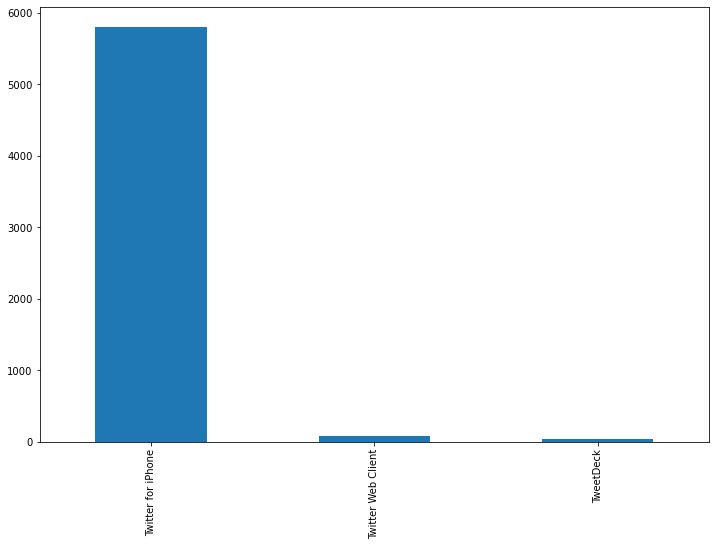

In [193]:
#Let's visualize our result

tweet_df['source'].value_counts().plot(kind='bar')

plt.savefig('bar.jpg')

#### Is there any correlation between our numerical values?

In [160]:
#storing the numerical values separately in a variable
tweet_numerical = tweet_df[['retweet_count', 'favorite_count','dog_rating','img_num','conf']]

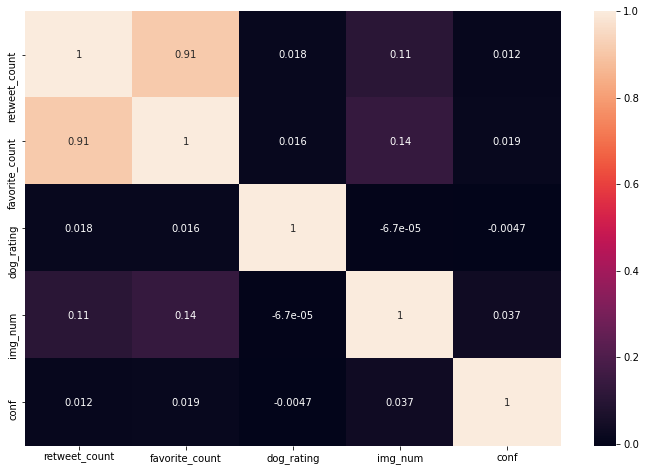

In [192]:
#Plot a heatmap to show the correlation between the numeric variables
sns.heatmap(tweet_numerical.corr(), annot = True);

plt.savefig('heatmap.jpg')

- We could see that there was a strong positive correlation of 0.91(91%) between `favorite_count` and `retweet_count`
- It is also evident that there is a strong negative correlation of -0.0047 between our `confidence level` bassed on the algorithm and the `dog_rating` values

#### we might want to plot a scatter plot to ascertain our claim on the correlation

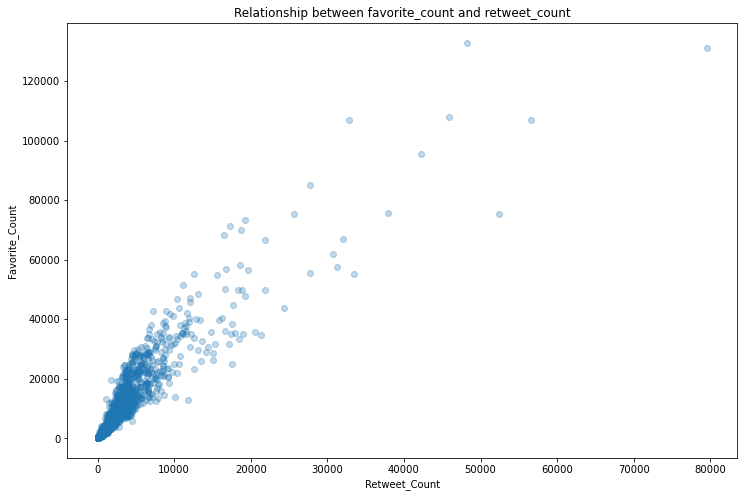

In [191]:
#Let's plot a scatter diagram showing the relationship between the retweets_count and favorite_count values
plt.scatter(data=tweet_df, x='retweet_count', y='favorite_count', alpha = 0.1);

#Titles and labels
plt.xlabel('Retweet_Count')
plt.ylabel('Favorite_Count')
plt.title('Relationship between favorite_count and retweet_count')

plt.savefig('correlation.jpg')

In [172]:
#Let's perform a groupby method on dog_name and check its mean rating

tweet_df.groupby(['dog_name']).dog_rating.mean().sort_values(ascending=False)[:15]

dog_name
 Atticus     8935.0
 Logan        750.0
 Sam          170.0
 Sophie       150.0
 Smiley       140.0
 Kuyu         140.0
 Clifford     140.0
 Doobert      140.0
 Emmy         140.0
 Cermet       140.0
 Laika        140.0
 Sundance     140.0
 Iggy         140.0
 General      140.0
 Dewey        130.0
Name: dog_rating, dtype: float64

In [174]:

tweet_df['dog_name'].value_counts()[:15]

 Oliver     33
 Charlie    33
 Lucy       30
 Cooper     30
 Penny      27
 Tucker     27
 Winston    24
 Sadie      24
 Toby       21
 Daisy      21
 Lola       21
 Koda       18
 Bo         18
 Jax        18
 Stanley    18
Name: dog_name, dtype: int64

- It is observed that dogs with names `Oliver` and `Charlie` seems to be higher than the rest, though these names are for humans

In [195]:
tweet_df.stage.value_counts()

pupper           603
doggo            189
puppo             66
doggo_pupper      24
floofer           21
doggo_puppo        3
doggo_floofer      3
Name: stage, dtype: int64

### What are the top dog_stages present?

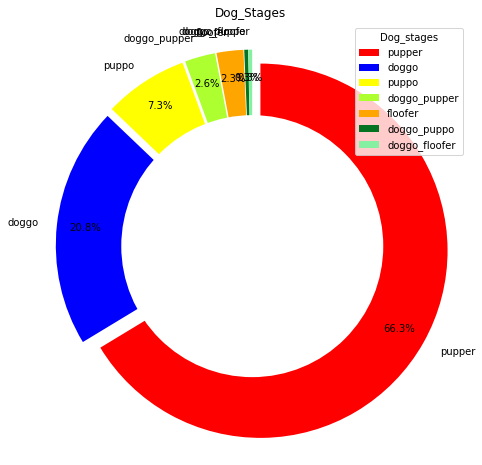

<Figure size 864x576 with 0 Axes>

In [190]:
#setting the figure size
#rcParams['figure.figsize'] = 12, 8

# Setting labels for items in Chart
dog_stage = tweet_df.stage.value_counts()[:7]


# colors
colors = ['#FF0000', '#0000FF', '#FFFF00','#ADFF2F', '#FFA500', '#057322', '#86f0a2']
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

# Pie Chart
plt.pie(dog_stage, colors = colors, labels=dog_stage.index, autopct='%1.1f%%', startangle=90,
         pctdistance=0.85, explode = explode, counterclock = False, labeldistance=1.1)
plt.axis('square');
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Dog_Stages')

# Add Legends
plt.legend(dog_stage.index, loc="upper right", title="Dog_stages")

# Displaying Chart
plt.show()

plt.savefig('donut.jpg')

- Pupper stage has the highest dog with 66.3%
- doggo stage dog was the second highest with 20.8%

In [189]:
tweet_df[tweet_df['retweet_count'] == tweet_df['retweet_count'].max()]

,tweet_id,retweet_count,favorite_count,dog_name,stage,dog_rating,timestamp,source,tweet_link,text,jpg_url,img_num,pred,dog,conf,result
2307,744234799360020481,79515,131075,NaN,doggo,130.0,2016-06-18 18:26:18,Twitter for iPhone,https://t.co/7wE9LTEXC4,Here's a doggo realizing you can stand in a po...,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,1,Labrador_retriever,0.825333,True
2308,744234799360020481,79515,131075,NaN,doggo,130.0,2016-06-18 18:26:18,Twitter for iPhone,https://t.co/7wE9LTEXC4,Here's a doggo realizing you can stand in a po...,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,2,ice_bear,0.044681,False
2309,744234799360020481,79515,131075,NaN,doggo,130.0,2016-06-18 18:26:18,Twitter for iPhone,https://t.co/7wE9LTEXC4,Here's a doggo realizing you can stand in a po...,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,3,whippet,0.018442,True


<a id="conclusions"></a>

### Conclusion

- We have conf. = 100%, it must be clear picture for a specific breed of dog.
- Some dogs got 0 rating
- Most of tweets have only one image.
- There is a strong positive correlation between the retweets count & favorite count.
- Twitter for iPhone is the most used application for Twitter followers of WeRateDogs.
- doggo_puppo and doggo_floofer multistage have same percentage of dogs (i.e 0.3%)
- Pupper & Doggo stages have more than 80% of the dogs.
- The `favorite_count` is always greater than the `retweet_count`
- The biggest retweet count was about 79,515 and that was in 18th, June 2016(2016-06-18).
- The number of images has weak correlation with confidence level of algorithm

## References

- How to draw donut chart using matplotlib: https://www.geeksforgeeks.org/donut-chart-using-matplotlib-in-python/